In [ ]:
# Connecting Google colab with Google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing required libraries and packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings(action ='ignore', category = UserWarning)

In [4]:
# Reading the 'MPG_Car_Data.csv' file as data

data = pd.read_csv('/content/drive/MyDrive/Datasets/MPG_Car_Data.csv')
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


#### For Multiple Linear Regression Model, I am considering the 'mpg' column as output variable, same as SLRM. However, as features or input variables, I am considering 'cylinders', 'displacement', 'horsepower', 'weight' and 'acceleration' as this is an example of MLRM

In [6]:
# Creating a data frame that contains the above columns

mlrm_data = data[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']]
mlrm_data.dtypes

,0
mpg,float64
cylinders,int64
displacement,float64
horsepower,int64
weight,int64
acceleration,float64


In [12]:
mlrm_data['cylinders'].unique()

array([8, 4, 6, 3, 5])

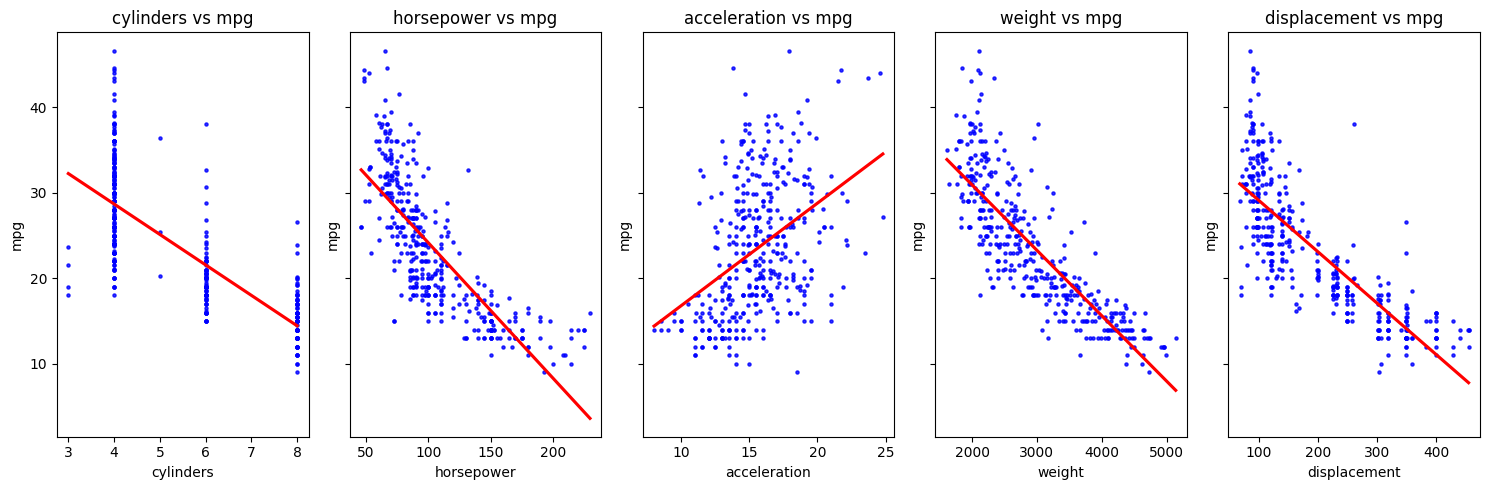

In [9]:
# Check the regression line/trend line for the output 'mpg' with 5 features in a single plot area

# List of input variables
input_vars = ['cylinders', 'horsepower', 'acceleration', 'weight', 'displacement']
output_var = 'mpg'

# Create subplots
fig, axes = plt.subplots(1, 5, figsize=(15, 5), sharey=True)

# Loop through each input variable and plot with regplot
for i, var in enumerate(input_vars):
    sns.regplot(x = var, y = output_var, data = mlrm_data, scatter_kws = {'color':'blue', 'marker':'o','s':5}, line_kws = {'color':'red'}, ci = None, ax = axes[i])
    axes[i].set_title(f'{var} vs {output_var}')

# Adjust layout
plt.tight_layout()
plt.show()

In [13]:
# Now, build a MLRM model using 'mpg' as output and rest variables as input variable

mlrm_model = LinearRegression()
mlrm_model.fit(mlrm_data[['cylinders', 'weight', 'displacement', 'acceleration', 'horsepower']], mlrm_data.mpg)

LinearRegression()

In [16]:
# Get the Coefficients of the model

slopes = mlrm_model.coef_
print('The Respective Slopes are:', slopes)
intercepts = mlrm_model.intercept_
print('The Intercept values are:', intercepts)

The Respective Slopes are: [-3.97928359e-01 -5.18691735e-03 -8.31301222e-05 -2.91047140e-02
 -4.52570802e-02]
The Intercept values are: 46.264307852571136


In [17]:
# Calculate the 'mpg' of a car having 6 cyliners, 3000 weight, 137 displacement, 15.9 acceleration and 120 horsepower

cys = 6
wt = 3000
dis = 137
acce = 15.9
hrp = 120
mlrm_model.predict([[cys, wt, dis, acce, hrp]])

array([22.41098226])

In [18]:
# How we get the mpg value of 22.41098226?
# This is because of the slopes and intercepts we get from building the model
# The calculation is shown below

req = slopes[0] * cys + slopes[1] * wt + slopes[2] * dis + slopes[3] * acce + slopes[4] * hrp + intercepts
req

22.410982258062923

In [20]:
# It is possible to apply this mlrm_model on to a pre defined data frame, same as SLRM
# Creating an imaginary data frame

d = pd.DataFrame({'cylinders':[3,5,8,4,7,5,6,8,9,7],
                  'weight':[3000,3100,2985,2787,2569,3012,2900,3425,3204,3200],
                  'displacement':[150,258,352,310,333,320,198,324,168,198],
                  'acceleration':[12.8,13.8,12,15,18.7,10.2,16.8,20.31,19.8,20],
                  'horsepower':[120,98,111,114,102,99,87,123,108,66]})

# Applying the model mlrm_model on to the d data frame and storing the result in a variable p

p = mlrm_model.predict(d)

# Creating new column 'mpg' in data frame d and storing the results of p under 'mpg' column

d['mpg'] = p

# Get final results

d

,cylinders,weight,displacement,acceleration,horsepower,mpg
0,3,3000,150,12.80,120,23.693911
1,5,3100,258,13.80,98,23.336936
2,8,2985,352,12.00,111,22.195878
3,4,2787,310,15.00,114,24.595008
4,7,2569,333,18.70,102,24.965456
5,5,3012,320,10.20,99,23.847750
6,6,2900,198,16.80,87,24.391892
7,8,3425,324,20.31,123,19.131017
8,9,3204,168,19.80,108,20.586066
9,7,3200,198,20.00,66,23.295152
